## Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from matplotlib import font_manager, rc
from tqdm import tqdm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## Data load

In [2]:
data = pd.read_csv('C:/Users/user/Desktop/DACON/jeju_credit_card/201901-202003.csv')
gc.collect()

7

### Features

'REG_YYMM' : 년월

'CARD_SIDO_NM' : 카드 이용지역_시도(가맹정 기준)

'CARD_CCG_NM' : '카드 이용지역_시군구(가맹점 기준)

'STD_CLSS_NM' : 업종명

'HOM_SIDO_NM' : 거주지역_시도(고객 집주소)

'HOM_CCG_NM' : 거주지역_시군구(고객 집주소)

'AGE' : 나이

'SEX_CTGO_CD' : 성별(1: 남, 2: 여)

'FLC' : 가구 생애 주기 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)

'CSTMR_CNT' : 이용고객수(명)

'AMT' : 이용금액(원)

'CNT' : 이용건수(건)

row : "특정" 날짜, 업종, 고객의 지역, 연령, 성별로 구분되는 그룹. 이 그룹의 이용 고객 수, 이용금액, 이용건수 또한 features로 표현되어 있다.

목적 : 주어지는 test 데이터(2020년 4월(Public), 2020년 7월(Private))를 특정 지역, 업종, 날짜(월)로 그룹화 하고, 해당그룹의 AMT(이용금액)을 예측하는 모델을 만드는 것.

In [13]:
data.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

## 데이터 살펴보기

In [14]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [15]:
data.shape

(24697792, 12)

전체 데이터 수는 24,697,792(약 2470만개)이며, 12개의 features를 갖는다.

### 전체 업종의 종류는?

In [16]:
print(data.STD_CLSS_NM.unique(),'\n\n')
print(f'업종의 종류는 {len(data.STD_CLSS_NM.unique())}개 이다.')

['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업'] 


업종의 종류는 41개 이다.


### 업종별 비율은?

In [17]:
grupby_clss = data.loc[:,['STD_CLSS_NM', 'AMT']].groupby('STD_CLSS_NM')

clss = pd.DataFrame(grupby_clss['STD_CLSS_NM'].count())
clss['ratio'] = clss.STD_CLSS_NM / len(data)
clss['percentage'] = clss['ratio'] * 100
clss = clss.sort_values('percentage', ascending = False)

clss['AMT'] = grupby_clss.sum()
clss
## 업종별 금액의 비율을 합쳐서 표현해보기

,STD_CLSS_NM,ratio,percentage,AMT
STD_CLSS_NM,,,,
한식 음식점업,3697166,0.149696,14.969622,13737489719551
체인화 편의점,3210466,0.129990,12.999000,5303958703193
슈퍼마켓,1630700,0.066026,6.602615,6730329364274
차량용 주유소 운영업,1613476,0.065329,6.532875,7708652073883
비알콜 음료점업,1586120,0.064221,6.422113,1143497863742
기타 대형 종합 소매업,1495163,0.060538,6.053833,7328854819388
서양식 음식점업,1404839,0.056881,5.688116,1748358904526
피자 햄버거 샌드위치 및 유사 음식점업,1351478,0.054721,5.472060,1100581283937
빵 및 과자류 소매업,989794,0.040076,4.007621,893591674917


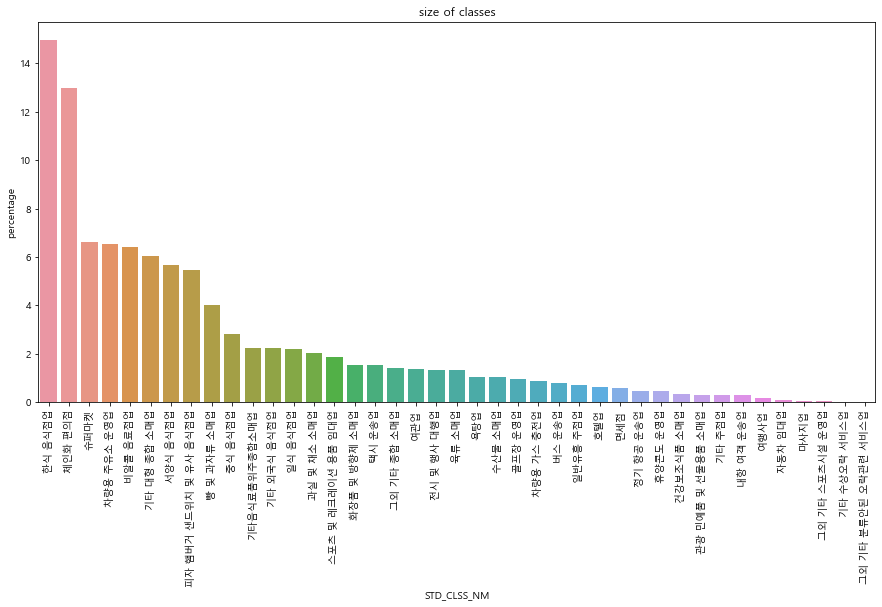

In [18]:
plt.figure(figsize = (15,7))
sns.barplot(clss.index, clss.percentage)
plt.title('size of classes')
plt.xticks(rotation= 90)
plt.show()

In [19]:
del grupby_clss
del clss
gc.collect()

10177

# 시각화

### 지역, 업종별 매출을 월별로 시각화


강원 면세점
강원 버스 운송업
강원 택시 운송업
강원 그외 기타 분류안된 오락관련 서비스업


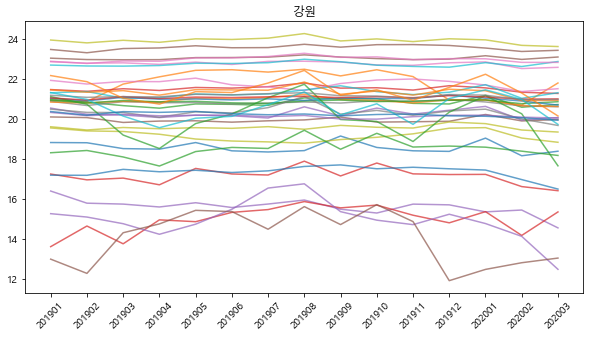

경기 내항 여객 운송업
경기 그외 기타 분류안된 오락관련 서비스업


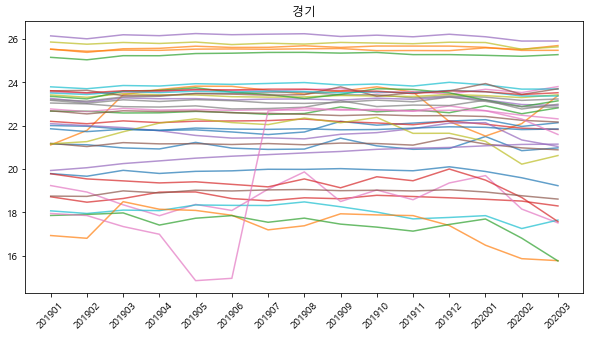

경남 자동차 임대업


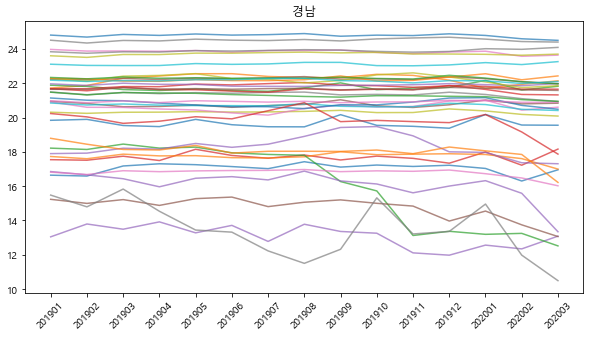

경북 그외 기타 분류안된 오락관련 서비스업
경북 여행사업
경북 내항 여객 운송업
경북 버스 운송업


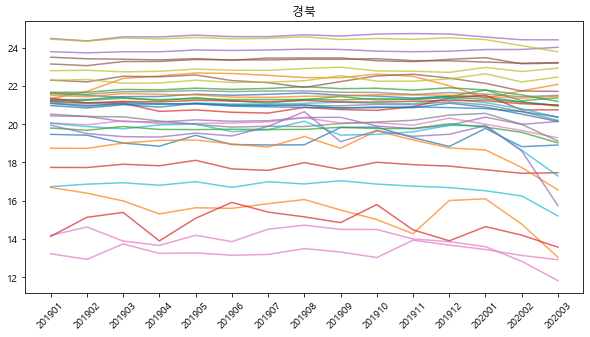

광주 기타 수상오락 서비스업
광주 내항 여객 운송업
광주 여행사업
광주 택시 운송업


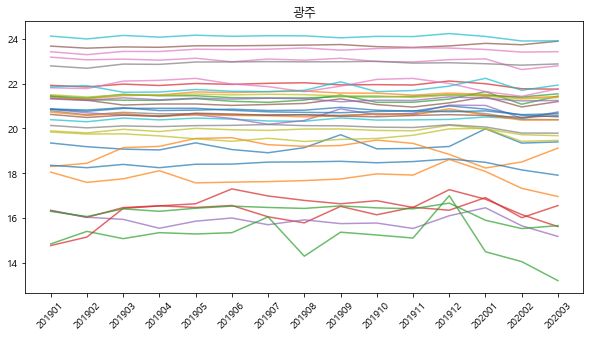

대구 여행사업
대구 버스 운송업
대구 면세점


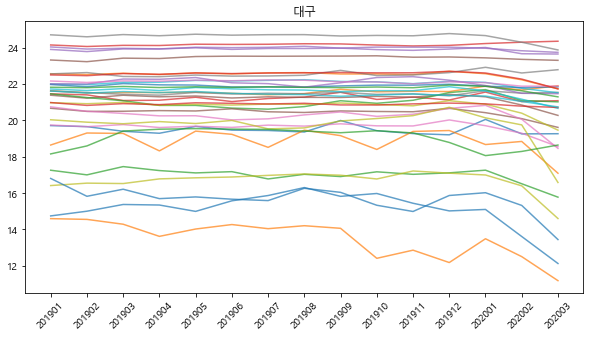

대전 기타 수상오락 서비스업
대전 자동차 임대업
대전 여행사업


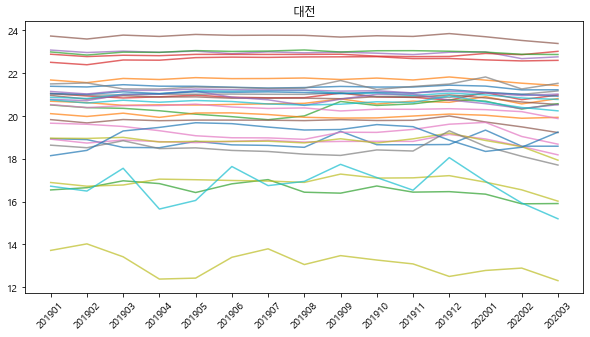

부산 내항 여객 운송업


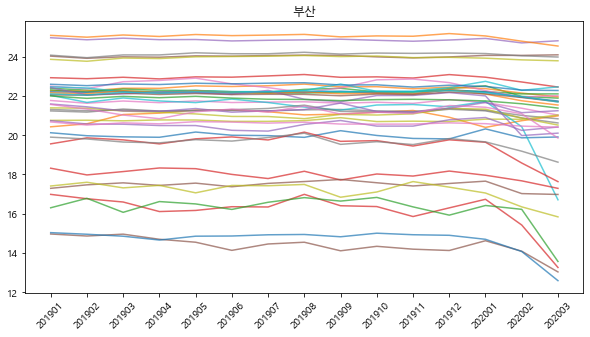

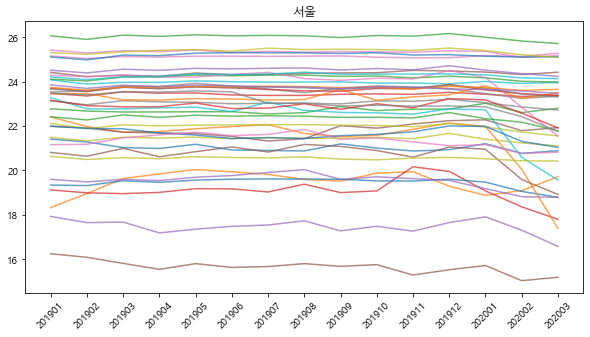

세종 관광 민예품 및 선물용품 소매업
세종 기타 수상오락 서비스업
세종 그외 기타 분류안된 오락관련 서비스업
세종 그외 기타 스포츠시설 운영업


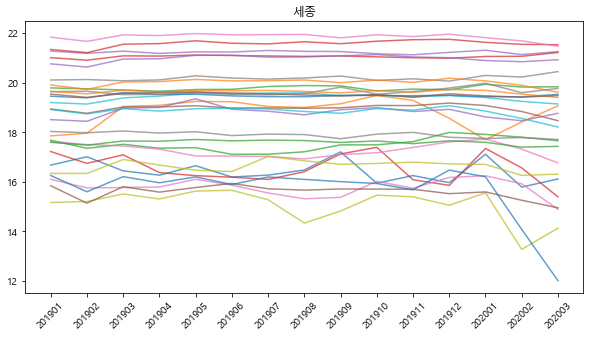

울산 기타 수상오락 서비스업
울산 면세점
울산 그외 기타 분류안된 오락관련 서비스업
울산 택시 운송업


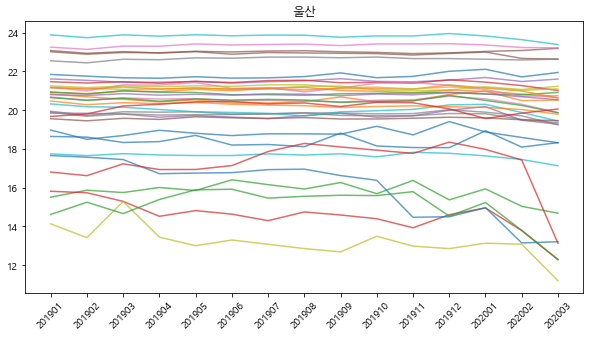

인천 자동차 임대업


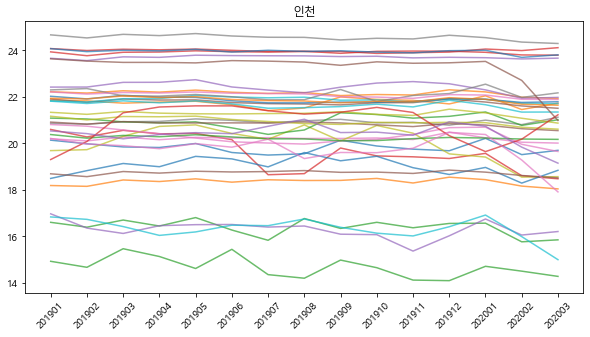

전남 면세점
전남 그외 기타 분류안된 오락관련 서비스업
전남 택시 운송업
전남 기타 수상오락 서비스업


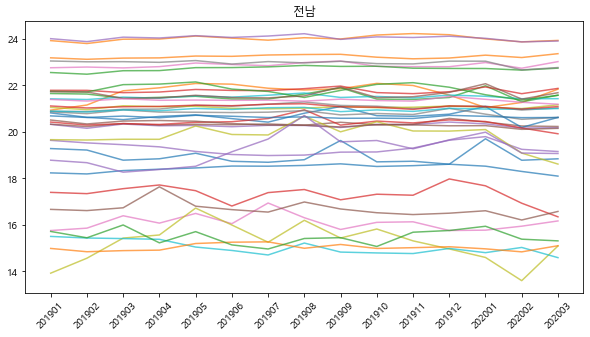

전북 내항 여객 운송업
전북 호텔업
전북 버스 운송업
전북 기타 수상오락 서비스업


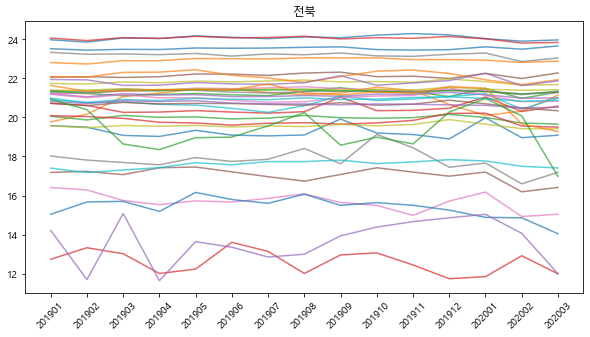

제주 그외 기타 스포츠시설 운영업
제주 기타 수상오락 서비스업
제주 그외 기타 분류안된 오락관련 서비스업
제주 택시 운송업


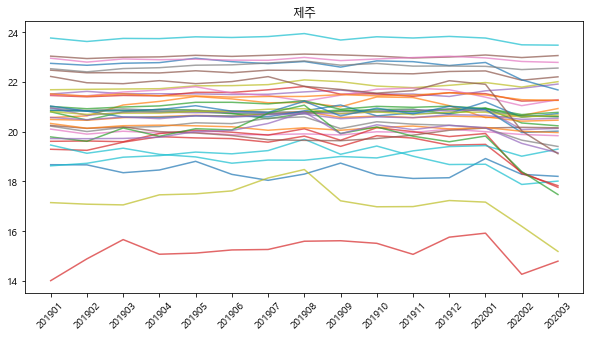

충남 내항 여객 운송업
충남 택시 운송업
충남 자동차 임대업
충남 정기 항공 운송업
충남 버스 운송업


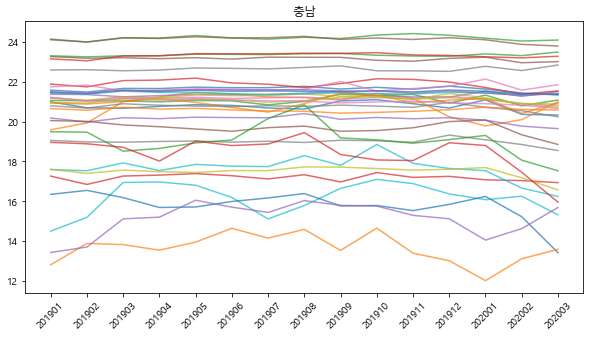

충북 자동차 임대업
충북 면세점
충북 버스 운송업
충북 내항 여객 운송업
충북 여행사업


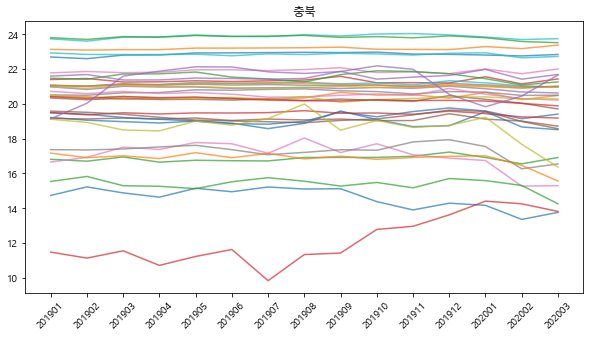

In [20]:
group_data = data.loc[:,['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM', 'AMT']].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM']).sum()
group_data = np.log(group_data)

days = group_data.reset_index()['REG_YYMM'].unique().astype('str')
days # REG_YYMM를 string으로 변환

citys = data.CARD_SIDO_NM.unique()
# citys : 지역(시도)의 이름들을 list로 저장

for city in citys:
    # 지역별로 figure생성
    plt.figure(figsize = (10,5))
    clsses = data[data.CARD_SIDO_NM == city].STD_CLSS_NM.unique()
    # 특정지역에서는 업종이 없는 경우도 있음.
    # 지역별로 업종 list를 새로 생성
    for clss in clsses:
        #업종별로 barplot 그리기 : x축은 날짜, y축은 해당 업종, 지역의 AMT 총합
        y = group_data.loc[city, clss,:].values.reshape(-1)
        #print(len(y), len(days))
        if len(y) == len(days):
            plt.plot(days, y, alpha = 0.7, label = city) 
        else:
            print(city, clss) # 월별데이터가 모두 없는 경우는 plot에서 제외하고 print
        plt.xticks(rotation= 45)
    plt.title(city)
    plt.show()
    #break